In [11]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

In [12]:
EndDate = dt.datetime.now()
StartDate = EndDate - dt.timedelta(days=5*365)
StartDate, EndDate

(datetime.datetime(2019, 12, 29, 5, 16, 24, 106829),
 datetime.datetime(2024, 12, 27, 5, 16, 24, 106829))

In [13]:
def download_stock_data(tickers, StartDate, EndDate):
    dataframes={}
    for ticker in tickers:
        data = yf.download(ticker, start=StartDate, end=EndDate)
        #flatting the columns
        if isinstance(data.columns, pd.MultiIndex):
            data.columns=['_'.join(col).strip() for col in data.columns.values]
        #removing ticker columns if it exists 
        if 'Tickers' in data.columns:
            data=data.drop(columns=['Tickers'])
        #ensuring that the columns names are standard
        data.columns=[col.split('_')[0] for col in data.columns]
        #stoting the cleaned dataframe in the dictionary 
        dataframes[ticker.lower()] = data
    return dataframes

In [14]:
tickers = ['AAPL','AMZN','NVDA','SMCI']

In [15]:
stock_data = download_stock_data(tickers, StartDate, EndDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
amzn_df = stock_data['amzn']
amzn_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-30 00:00:00+00:00,92.344498,92.344498,94.199997,92.030998,93.699997,73494000
2019-12-31 00:00:00+00:00,92.391998,92.391998,92.663002,91.611504,92.099998,50130000
2020-01-02 00:00:00+00:00,94.900497,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03 00:00:00+00:00,93.748497,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06 00:00:00+00:00,95.143997,95.143997,95.184502,93.000000,93.000000,81236000


In [17]:
import mplfinance as mpf

In [18]:
def plot_candlestick(data, title='Candlestick chart'):
    #insuring the index is a datetime index
    data.index = pd.to_datetime(data.index)
    #filtering the last 30 rows
    data_last_30 = data.tail(30)
    #plotting the candlestick chart
    mpf.plot(data_last_30, type='candle',title=title, style='yahoo',volume=True, mav=(5,10))

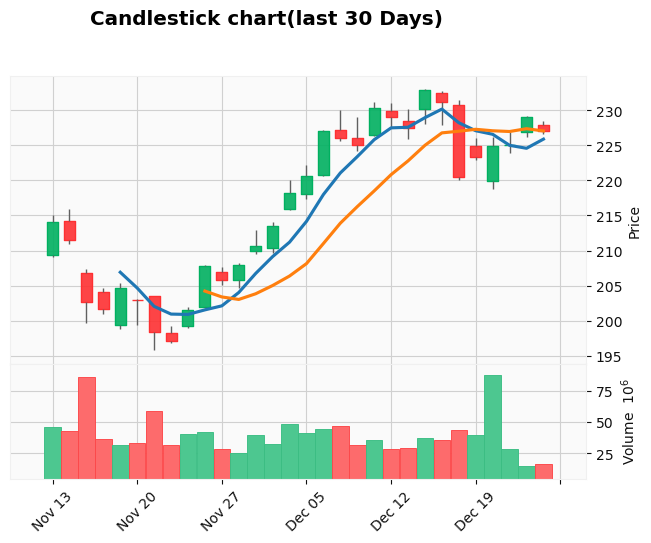

In [19]:
plot_candlestick(amzn_df, title='Candlestick chart(last 30 Days)')

In [20]:
smci_df = stock_data['smci']
smci_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-30 00:00:00+00:00,2.400,2.400,2.419,2.399,2.415,1211000
2019-12-31 00:00:00+00:00,2.402,2.402,2.411,2.394,2.400,1093000
2020-01-02 00:00:00+00:00,2.363,2.363,2.418,2.342,2.385,4178000
2020-01-03 00:00:00+00:00,2.344,2.344,2.374,2.340,2.340,302000
2020-01-06 00:00:00+00:00,2.327,2.327,2.350,2.323,2.340,933000


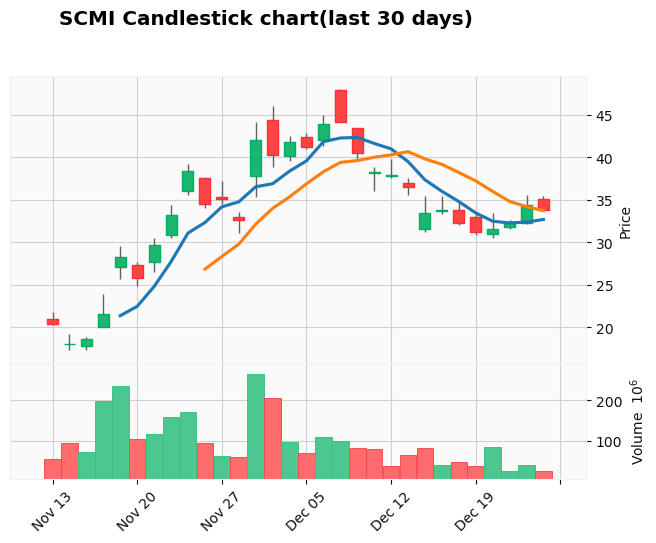

In [21]:
plot_candlestick(smci_df, title='SCMI Candlestick chart(last 30 days)')

In [22]:
nvda_df = stock_data['nvda']
nvda_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-30 00:00:00+00:00,5.783752,5.80800,5.90500,5.77650,5.89975,258056000
2019-12-31 00:00:00+00:00,5.857942,5.88250,5.89200,5.75325,5.77250,231004000
2020-01-02 00:00:00+00:00,5.972710,5.99775,5.99775,5.91800,5.96875,237536000
2020-01-03 00:00:00+00:00,5.877111,5.90175,5.94575,5.85250,5.87750,205384000
2020-01-06 00:00:00+00:00,5.901758,5.92650,5.93175,5.78175,5.80800,262636000


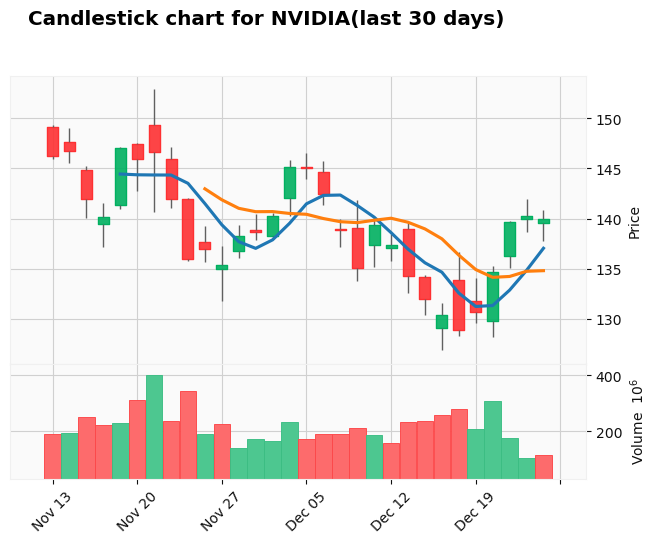

In [23]:
plot_candlestick(nvda_df, title="Candlestick chart for NVIDIA(last 30 days)")

In [24]:
aapl_df = stock_data['aapl']
aapl_df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-30 00:00:00+00:00,70.655876,72.879997,73.172501,71.305000,72.364998,144114400
2019-12-31 00:00:00+00:00,71.172127,73.412498,73.419998,72.379997,72.482498,100805600
2020-01-02 00:00:00+00:00,72.796005,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088303,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200


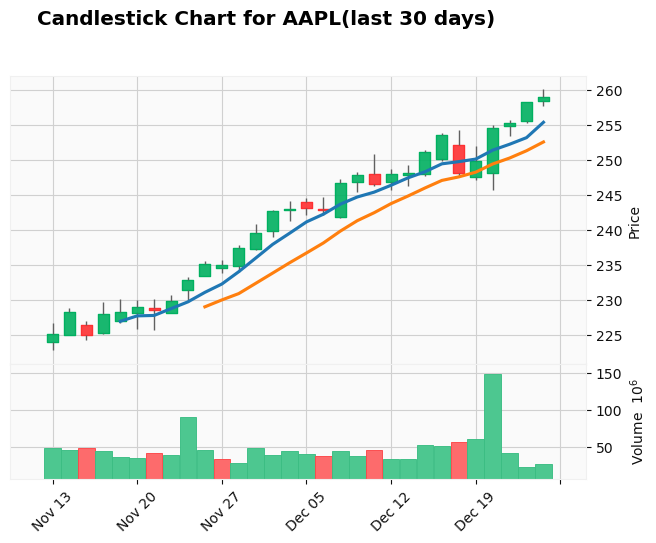

In [25]:
plot_candlestick(aapl_df, title="Candlestick Chart for AAPL(last 30 days)")

In [26]:
def calculate_and_plot_return(data, ticker_name):
    #calculate daily returns
    data['returns']=(data['Adj Close']/data['Adj Close'].shift(1))-1
    #Dropping nan caused by shift
    returns = data['returns'].dropna()
    #plotting histogram
    plt.figure(figsize=(10,6))
    plt.hist(returns, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Histogram of Returns for {ticker_name}")
    plt.xlabel("Daily Returns")
    plt.ylabel("Frequency")
    plt.grid(True)

    return returns

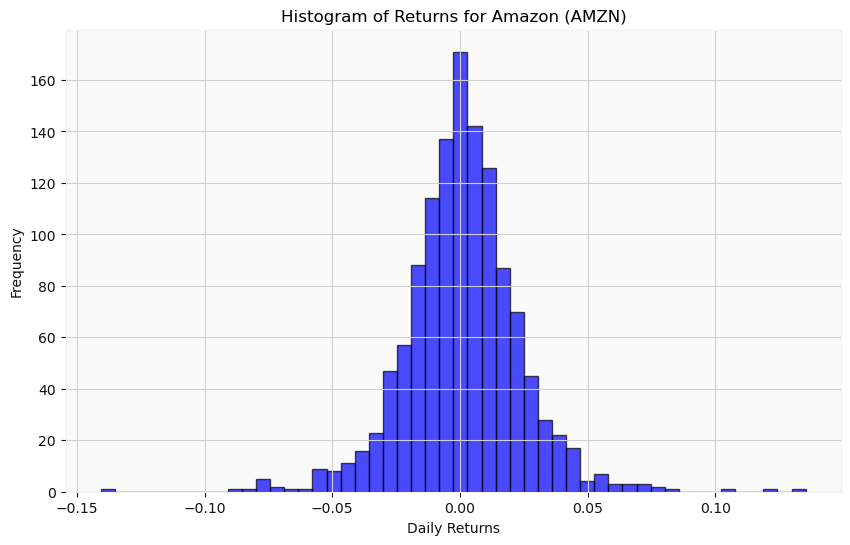

In [27]:
amzn_returns=calculate_and_plot_return(amzn_df, "Amazon (AMZN)")

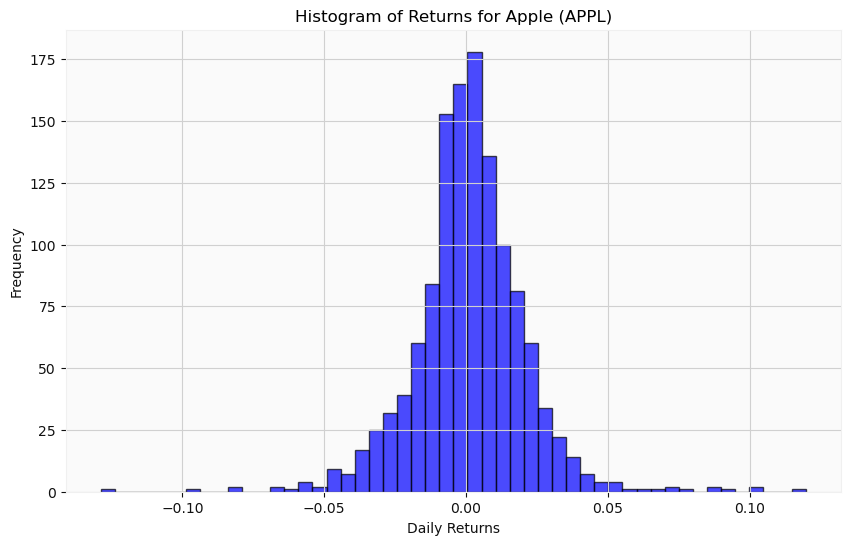

In [28]:
aapl_returns = calculate_and_plot_return(aapl_df, "Apple (APPL)")

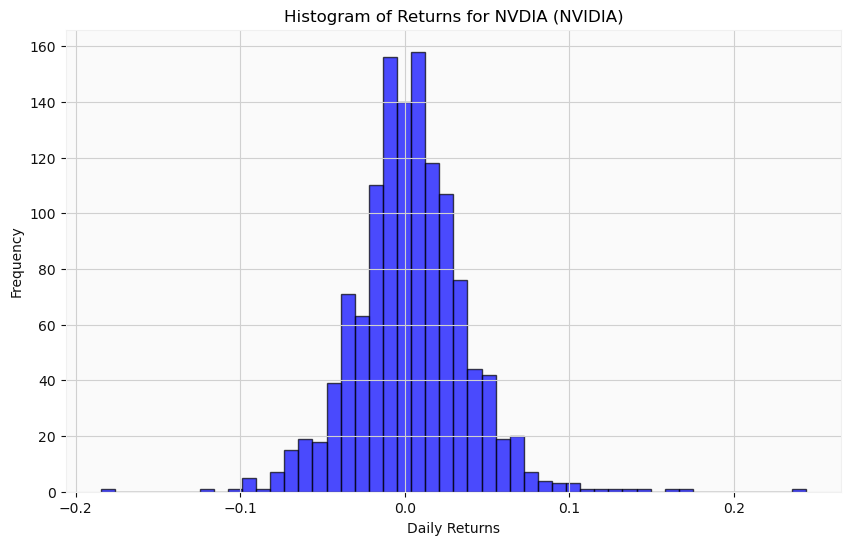

In [29]:
nvda_returns=calculate_and_plot_return(nvda_df, "NVDIA (NVIDIA)")

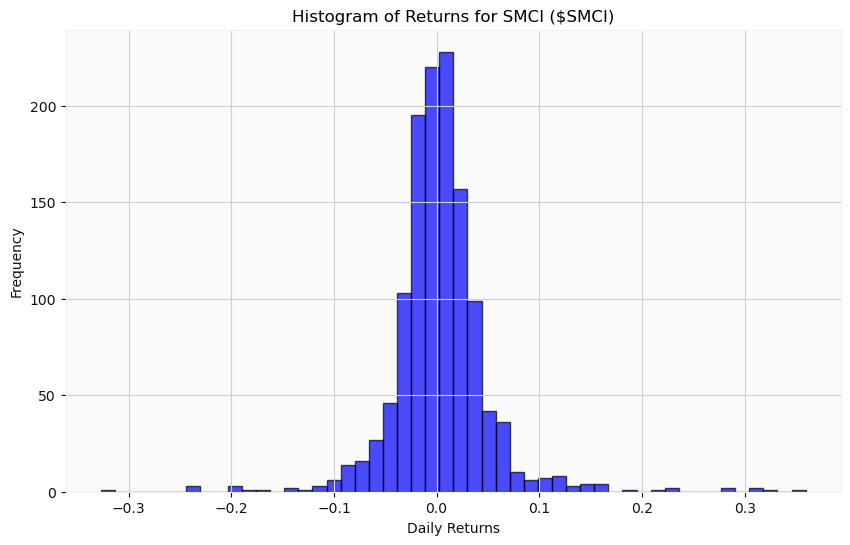

In [30]:
smci_returns = calculate_and_plot_return(smci_df, "SMCI ($SMCI)")

In [31]:
def calculate_and_plot_all_returns(datasets, tickers):
    returns_dict={}
    plt.figure(figsize=(12,8))
    for dataset, ticker in zip(datasets, tickers):
        #calculate the returns
        dataset['Returns'] = (dataset['Adj Close']/dataset['Adj Close'].shift(1))-1
        returns = dataset['Returns'].dropna()
        returns_dict[ticker] = returns

        #plot histogram
        plt.hist(returns, bins=50, alpha=0.5, label=ticker, edgecolor="black")

    #Add label and legends
    plt.title("Histogram of Returns for all stocks")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    return returns_dict

In [32]:
datasets = [amzn_df, aapl_df, nvda_df, smci_df]
tickers = ['$AMZN', '$AAPL','$NVDA','$SMCI']

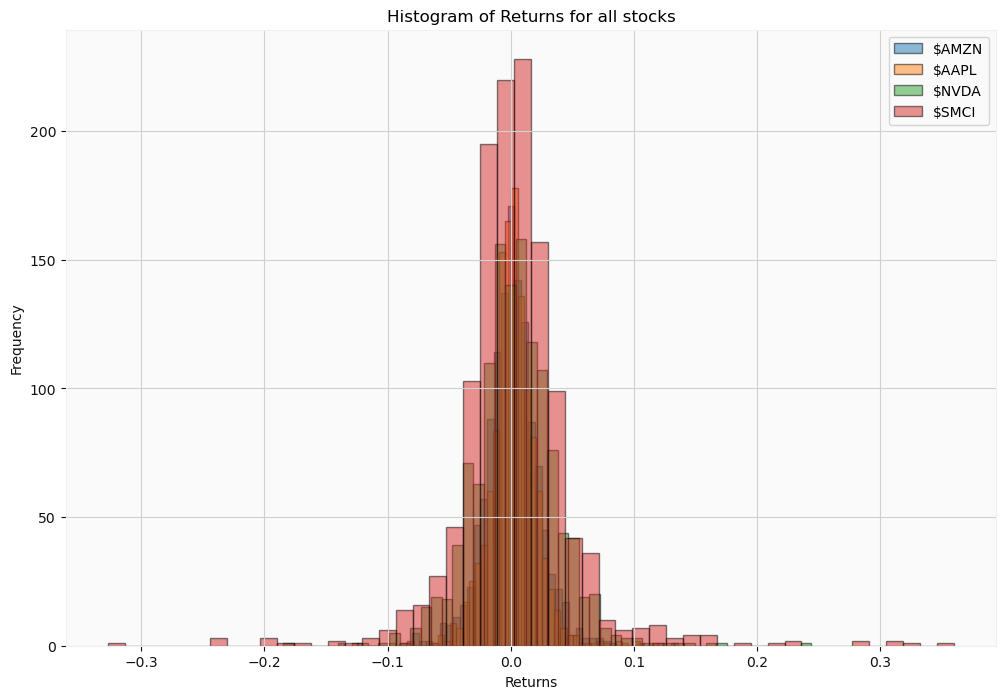

In [33]:
all_returns = calculate_and_plot_all_returns(datasets, tickers)